## Imports

In [1]:
import sys
sys.path.append('../')

In [9]:
from PIL import Image
import requests
import os
import cv2
import numpy as np
from pathlib import Path

In [3]:
import insightface
from flask_app.commons.util import pil_to_cv2, cv2_to_pil

In [4]:
%load_ext autoreload
%autoreload 2

## Objective

Modularize single face detection so that face detection can be modularized and setup as a standalone endpoint 

## Constants

In [5]:
DETECTION_THRESHOLD = 0.6

## Test Image

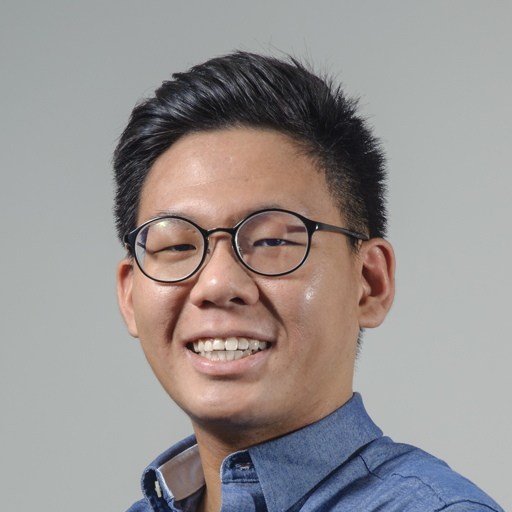

In [6]:
positive_img = Image.open('../demo_file/Kianboon_cropped.jpg')
positive_img.thumbnail((512,512))
positive_img

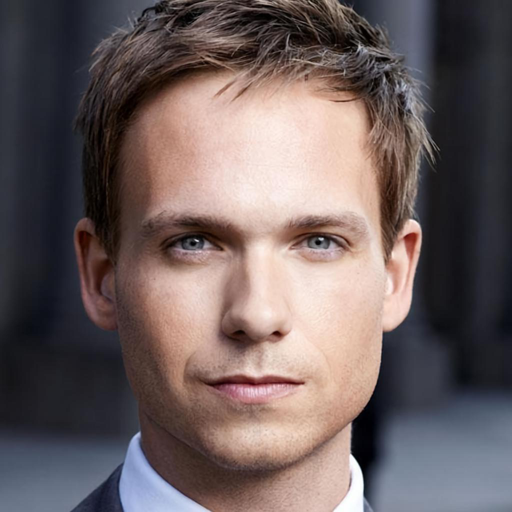

In [7]:
negative_img = Image.open('../demo_file/src/3.jpg')
negative_img.thumbnail((512,512))
negative_img

## App

In [13]:
detector = insightface.model_zoo.get_model('../insightface_func/models/antelope/scrfd_10g_bnkps.onnx')
print(detector.taskname)
detector.prepare(ctx_id=0, input_size=(640, 640))

detection


## Image With High Score

In [183]:
img_cv = pil_to_cv2(positive_img)

In [184]:
detection_results = detector.detect(img_cv, threshold=DETECTION_THRESHOLD)

In [185]:
bboxes, kpss = detection_results

In [186]:
kpss

array([[[175.00943, 247.51627],
        [276.40082, 242.39542],
        [215.56192, 287.7075 ],
        [182.85344, 345.9392 ],
        [273.6615 , 342.55963]]], dtype=float32)

In [187]:
bboxes

array([[130.7181   , 129.05704  , 355.4787   , 419.88428  ,   0.8387289]],
      dtype=float32)

In [191]:
x1, y1, x2, y2 = [int(i) for i in bboxes[0][0:4]]
score = bboxes[0][4]

### Draw detection bounding box

In [192]:
img_cv = cv2.rectangle(img_cv, (x1, y1), (x2,y2), (0, 255, 0))

### Draw Keypoints

In [193]:
keypoints = [cv2.KeyPoint(x,y, 0.1) for x,y in kpss[0]]

In [194]:
img_cv = cv2.drawKeypoints(img_cv, keypoints, outImage=np.array([]), color=(0,255,0))

### Visualize

score: 0.8387289047241211


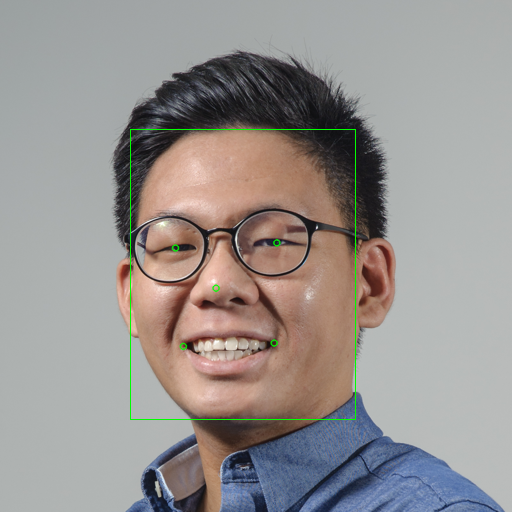

In [196]:
print(f'score: {score}')
cv2_to_pil(img_cv)

## Image with Low Score

In [209]:
img_cv = pil_to_cv2(negative_img)

In [210]:
detection_results = detector.detect(img_cv, threshold=0.4)

In [211]:
bboxes, kpss = detection_results

In [212]:
kpss

array([[[191.74835, 241.04033],
        [319.09943, 240.9316 ],
        [258.74564, 321.5723 ],
        [203.09055, 379.03668],
        [305.27045, 379.1826 ]]], dtype=float32)

In [213]:
bboxes

array([[119.170555 ,  84.81213  , 383.64655  , 467.62314  ,   0.5041976]],
      dtype=float32)

In [214]:
x1, y1, x2, y2 = [int(i) for i in bboxes[0][0:4]]
score = bboxes[0][4]

### Draw detection bounding box

In [215]:
img_cv = cv2.rectangle(img_cv, (x1, y1), (x2,y2), (0, 255, 0))

### Draw Keypoints

In [216]:
keypoints = [cv2.KeyPoint(x,y, 0.1) for x,y in kpss[0]]

In [217]:
img_cv = cv2.drawKeypoints(img_cv, keypoints, outImage=np.array([]), color=(0,255,0))

### Visualize

score: 0.5041975975036621


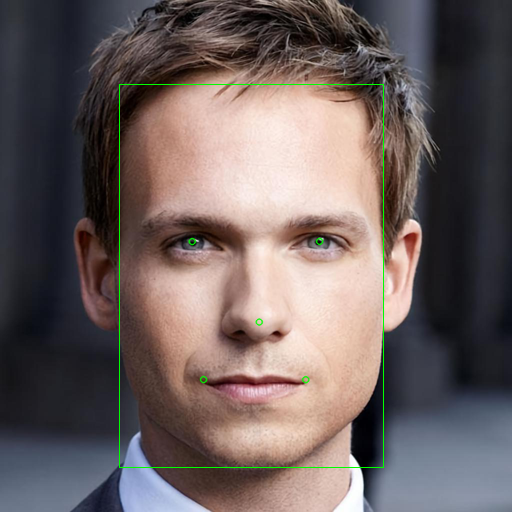

In [218]:
print(f'score: {score}')
cv2_to_pil(img_cv)